# Image Compression

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle
import base64


In [94]:
def calculate_image_size(width, height, bits_per_pixel):
    return width * height * bits_per_pixel

In [95]:
def image_inputReadProcess():
    image=cv2.imread('./images/fish2.jpg')
    #convert image read from bgr to RGB
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    #scale image
    image=image/255.0
    #return processed image
    return image

In [96]:
print(image_inputReadProcess())

[[[0.07843137 0.05098039 0.22352941]
  [0.09803922 0.07058824 0.24313725]
  [0.11372549 0.09019608 0.2627451 ]
  ...
  [0.04705882 0.03921569 0.1254902 ]
  [0.04705882 0.03921569 0.1254902 ]
  [0.04705882 0.03921569 0.1254902 ]]

 [[0.08235294 0.05490196 0.22745098]
  [0.09803922 0.07058824 0.24313725]
  [0.11372549 0.09019608 0.27058824]
  ...
  [0.05098039 0.04313725 0.12941176]
  [0.04705882 0.03921569 0.1254902 ]
  [0.04705882 0.03921569 0.1254902 ]]

 [[0.08235294 0.05098039 0.23529412]
  [0.09803922 0.06666667 0.25098039]
  [0.11372549 0.09019608 0.27843137]
  ...
  [0.05098039 0.04313725 0.12941176]
  [0.05098039 0.04313725 0.12941176]
  [0.04705882 0.03921569 0.1254902 ]]

 ...

 [[0.01960784 0.02352941 0.04313725]
  [0.01960784 0.02352941 0.04313725]
  [0.01960784 0.02352941 0.04313725]
  ...
  [0.01568627 0.01176471 0.03529412]
  [0.01568627 0.01176471 0.03529412]
  [0.01568627 0.01176471 0.03529412]]

 [[0.01960784 0.02352941 0.04313725]
  [0.01960784 0.02352941 0.04313725]


In [97]:
#initialize random centroid
def initMeans(image,clusters):
    points=image.reshape((-1,image.shape[2]))
    m,n=points.shape
    
    means=np.zeros((clusters,n))
    
    for i in range(clusters):
        random=np.random.choice(m,size=10,replace=False)
        means[i]=np.mean(points[random],axis=0)
    
    return points,means
    

In [98]:
def distance(x1,y1,x2,y2):
    dist=np.square(x1-x2)+np.square(y1-y2)
    dist=np.sqrt(dist)
    return dist

In [99]:
def kMeans_Alg(p,mns,c):
    iterations=10
    m,n=p.shape
    index=np.zeros(m)
    
    while iterations>0:
        for j in range(m):
            minimum_dist=float('inf')
            temp=None
            
            for k in range(c):
                x1,y1=p[j,0],p[j,1]
                x2,y2=mns[k,0],mns[k,1]
                
                if distance(x1,y1,x2,y2)<=minimum_dist:
                    minimum_dist=distance(x1,y1,x2,y2)
                    temp=k
                    index[j]=k
        
        for k in range(c):
            c_points=p[index==k]
            if len(c_points)>0:
                mns[k]=np.mean(c_points,axis=0)
        iterations-=1
    
    return mns,index

In [100]:
from datetime import datetime
current_time = datetime.now()
formatted_time = current_time.strftime("%Y%m%d%H%M%S")


In [101]:
def image_compress(m, i, img, clusters):
    centroid = np.array(m)
    # Reshape the centroid array to match the shape of the original image
    recovered = centroid[i.astype(int), :].reshape(img.shape)
    
    # Saving the compressed image using OpenCV
    
    compressed_image_path =  f'./images/compressed_{formatted_time}-{clusters}_colors.png'
    cv2.imwrite(compressed_image_path, (recovered * 255).astype(np.uint8))
    
    #compressed_image_pickle_path = f'./images/compressed_{clusters}_colors.pkl'
    #compressed_image_data = (recovered * 255).astype(np.uint8)
    #with open(compressed_image_pickle_path, 'wb') as f:
     #   pickle.dump(compressed_image_data, f)
    
    

    
    # Display the compressed image using matplotlib
    plt.axis('off')
    plt.imshow(recovered)
    plt.show()

    return compressed_image_path


In [102]:
# Calculate sizes
import os
clusters=16
clusters=int(input('Enter number of colors in the compressed image: '))



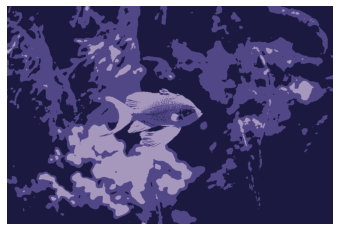

In [103]:
if __name__=='__main__':
    img=image_inputReadProcess()
    # Get the original image shape from the processed image
    

    
    points,means=initMeans(img,clusters)
    means,index=kMeans_Alg(points,means,clusters)
    image_compress(means,index,img,clusters)
    

In [104]:
# Define image file paths
original_image_path = './images/fish2.jpg'
compressed_image_path = f'./images/compressed_{formatted_time}-{clusters}_colors.png' 
#compressed_image_pickle_path = f'./images/compressed_{formatted_time}-{clusters}_colors.pkl'


# Get file sizes in bytes
original_image_size_bytes = os.path.getsize(original_image_path)
compressed_image_size_bytes = os.path.getsize(compressed_image_path)

# Print sizes
print(f"Original image size: {original_image_size_bytes / 1024:.2f} KB")
print(f"Compressed image size: {compressed_image_size_bytes / 1024:.2f} KB")
print(f"Compression ratio: {original_image_size_bytes / compressed_image_size_bytes:.2f}")



Original image size: 78.99 KB
Compressed image size: 62.29 KB
Compression ratio: 1.27


Loading pickled image file

In [105]:
# Load the compressed image data from the serialized file
def load_compressed_image(compressed_image_pickle_path):
    with open(compressed_image_pickle_path, 'rb') as f:
        compressed_image_data = pickle.load(f)
    return compressed_image_data

In [106]:
# After serialization:
"""
compressed_image_pickle_path = f'./images/compressed_{clusters}_colors.pkl'
compressed_image_data = load_compressed_image(compressed_image_pickle_path)
img=image_inputReadProcess()
# Get the original image shape from the processed image
original_image_shape = img.shape
# Reshape the serialized data to the original image shape
recovered_image = compressed_image_data.reshape(original_image_shape)

# Display the recovered image
plt.axis('off')
plt.imshow(recovered_image)
plt.show()
"""

"\ncompressed_image_pickle_path = f'./images/compressed_{clusters}_colors.pkl'\ncompressed_image_data = load_compressed_image(compressed_image_pickle_path)\nimg=image_inputReadProcess()\n# Get the original image shape from the processed image\noriginal_image_shape = img.shape\n# Reshape the serialized data to the original image shape\nrecovered_image = compressed_image_data.reshape(original_image_shape)\n\n# Display the recovered image\nplt.axis('off')\nplt.imshow(recovered_image)\nplt.show()\n"

In [107]:
# Print the serialized image data
#print(compressed_image_data)

# Image Segmentation 
OpenCV K-Means

In [108]:
rawImage=cv2.imread('./images/fish2.jpg')
imageReshape=rawImage.reshape((-1,3))
#change to data type of float
X=np.float32(imageReshape)

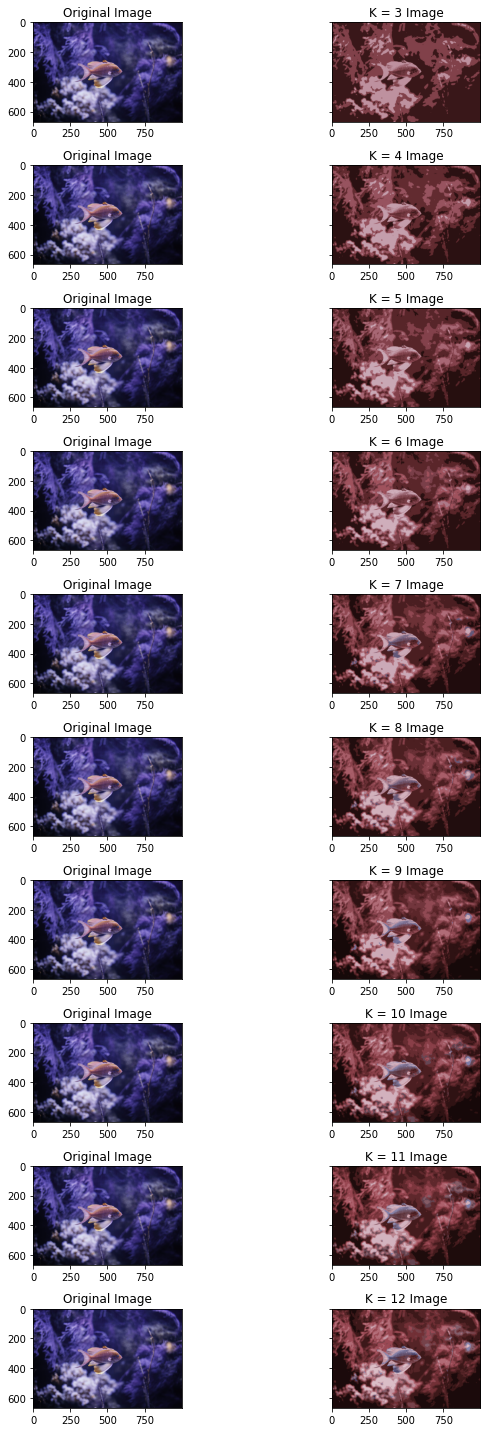

In [109]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
  
fig, ax = plt.subplots(10, 2, figsize=(10, 20), sharey=True)  # Adjust the figsize as needed
for i in range(10):
    K = i + 3
    # apply K-means algorithm
    ret, label, center = cv2.kmeans(X, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    # Now convert back into uint8, and make the original image
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape(img.shape)
    # plot the original image and K-means image
    ax[i, 1].imshow(res2)
    ax[i, 1].set_title('K = %s Image' % K)
    ax[i, 0].imshow(img)
    ax[i, 0].set_title('Original Image')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

# Local Deployment

In [112]:
#serializing an image using base 64 encoding
compressed_image=cv2.imread(compressed_image_path)
_,imgBytes=cv2.imencode('.png',compressed_image)
#encoded to base64 image
image_Base64=base64.b64encode(imgBytes).decode('utf-8')
#take a look at the base64 encoded image
print(image_Base64)

iVBORw0KGgoAAAANSUhEUgAAA+gAAAKbCAIAAADpADdoAAAgAElEQVR4AezBvQ3iUBBG0UsZiB4mnJRwJ2QDatpinDicGr5wKloJCQkEBpt/wztnsV6uGBDm7GSJpnm0MGe0LHFRmHPMN1uOqe84kCWaE2HODGWJGQpz7pYlmq8Q5gzLEs0chDkHshTmvESWaL7aYr1ccU6Ys5clmubRwpzRssRFYc4B32w5ob7jQJZoToQ5M5Ql5inMuUmWaL5ImHNRlmjmIMx5nyzRfK/FerninDBnL0s0zROEOeNkiYvCnD3fbDlHfceBLNEcC3PmKUvMU5hzkyzRfJEw55os0cxHmPNuWaL5Iov1csU5Yc5elmiaJwhzRssSA8KcA77Zco76jgNZojkW5sxQlpitMOcmWaL5FmHOOFmimYkw5yNliWaeFuvlihNhzoEs0TRPEOaMliUGhDl7vtkyQH3HgSzRHAhzZihLzFaYc6ss0XyLMGe0LNHMQZjzwbJEMzeL9XLFsTDnQJZomqcJc8bJEueEOXu+2XKR+o4DWaLZC3NmKEvMVphzhyzRfIUwZ4os0cxBmPPZskQzH4v1csWxMOdAlmiaRwtzIEthzjhZ4pwwZ883Wy5S33EgSzQ7Yc50WeJAmPNyWWK2wpw7ZIlm/sKcibJEMxNhzkxkieazLdbLFcfCnANZomkeKsyZLkucE+bs+WbLReo7DmSJZifMmShLnBPmvFCWmK0wB7IU5kyXJZr5C3MmyhLNTIQ585ElLgpz9rJE81qL9XLFsTDnQJZomkcLcyBLYc44WeJEmHPAN1suUt9xIEs0O2HOFFliQJjzcllibsIcyFKYs5elMGecLNHMX5gzUZZoZiLMmZsscSLMGZAlmpdYrJcrjoU5e1miaZ4szBkhS5wIcw74Zssw9R3HskSzE+aMliWGhTkvlyVmKMyzFObsZAkIc8bJEs38hTkTZYlmJsKcmctSmHNNlmiebLFerjgQ5hzI